In [1]:
# import geopandas as gpd
import numpy as np
import pandas as pd
import copy

In [2]:
data = pd.read_csv("./data/nndb_flat.csv")

In [3]:
data.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


# Data Preprocessing

In [4]:
data.notnull()
data = data.drop(columns=['CommonName','MfgName','ScientificName'])

In [5]:
data.head()

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",876.0,0.28,99.48,0.00,0.00,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",353.0,21.40,28.74,2.34,0.50,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",371.0,23.24,29.68,2.79,0.51,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [6]:
descrip = np.array(data['Descrip'])
words = ""
for i in descrip:
    words += i.lower()+','
differentwords = (words.split(','))

In [7]:
count = 0
for i in differentwords:
    if('pizza' in i):
        count+=1


In [8]:
count

97

In [9]:
len(set(differentwords))

5952

In [10]:
groups = np.array(data['FoodGroup'])
len(set(groups))

25

In [11]:
set(differentwords)

{'',
 ' instant breakfast powder',
 ' 100 grand bar',
 'mustard spinach',
 ' apple and raspberry',
 ' dark',
 ' flavored with meat italian sauce',
 ' with broth',
 ' 80 proof',
 'juice smoothie',
 ' rolo caramels in milk chocolate',
 'p rego pasta',
 'fish sticks',
 'cattail',
 ' swordfish',
 ' royal red',
 ' mocha-flavor',
 ' perrier',
 ' mouvedre',
 'next step prosobee',
 ' cornbread',
 ' bagel chips',
 ' berry burst cheerios',
 ' 3.25% milkfat',
 ' under blade pot roast or steak',
 ' grilled chicken & sausage gumbo soup',
 " reese's pieces candy",
 ' hulled',
 ' link',
 ' bacon ranch salad without chicken',
 ' snack sticks',
 ' turkey breast (oven roasted',
 ' original recipe',
 ' crunchy almond/brown sugar',
 ' common (danish',
 ' pork)',
 'chives',
 ' fruit flavored',
 ' commercially prepared with chocolate frosting',
 ' silken tofu',
 ' atlantic',
 ' peanut butter on cheese crackers',
 ' pinto bean and hominy',
 ' dehydrated flakes',
 ' flap',
 ' uses similar to high quality coco

In [12]:
set(groups)

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

In [13]:
nonveg = [
 'American Indian/Alaska Native Foods',
 'Beef Products',
 'Dairy and Egg Products',
 'Finfish and Shellfish Products',
 'Lamb, Veal, and Game Products',
 'Pork Products',
 'Poultry Products',
 'Sausages and Luncheon Meats',]
remove = ['Restaurant Foods','Meals, Entrees, and Side Dishes', 'Fast Foods', 'Baked Products',]

In [14]:
len(remove)

4

In [15]:
newlabels = []
index = []
j = 0
for i in groups:
    if(i in nonveg):
        newlabels.append('Non-Veg')
    elif(i in remove):
        newlabels.append('Remove')
        index.append(j)
    else:
        newlabels.append('Veg')
    j+=1

In [16]:
newlabels

['Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'Non-Veg',
 'No

In [17]:
len(index)

1389

In [18]:
from collections import Counter

In [19]:
Counter(newlabels)

Counter({'Non-Veg': 3057, 'Veg': 4172, 'Remove': 1389})

In [20]:
data['FoodGroup'] = newlabels

In [21]:
data.head()

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Non-Veg,"BUTTER,WITH SALT","Butter, salted",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Non-Veg,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Non-Veg,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",876.0,0.28,99.48,0.00,0.00,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Non-Veg,"CHEESE,BLUE","Cheese, blue",353.0,21.40,28.74,2.34,0.50,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Non-Veg,"CHEESE,BRICK","Cheese, brick",371.0,23.24,29.68,2.79,0.51,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [22]:
datacopy = copy.deepcopy(data)

In [23]:
data = data.loc[data['FoodGroup'] != 'Remove']

In [24]:
len(data)

7229

In [25]:
data = data.drop(columns=['ShortDescrip','Descrip','ID'])

In [26]:
energy = data['Energy_kcal']
label = data['FoodGroup']

In [27]:
data = data.drop(columns=['Energy_kcal','FoodGroup'])

In [28]:
data.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


# Splitting in 70:30

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,energy, test_size = 0.3, random_state = 42)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
import  matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

# Linear Regression

In [36]:
reg = LinearRegression().fit(x_train, y_train)
y_pred_test = reg.predict(x_test)

In [33]:
len(y_test),len(y_pred_test)

(2169, 2169)

# Regression Metrics

In [38]:
def reg_metrics(y_test,y_pred):
    print("MSE: " + str(mean_squared_error(y_test, y_pred)) +"\n" )
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE: "+str(rmse)+"\n")
    mae=mean_absolute_error(y_test, y_pred)
    print("MAE: "+str(mae)+"\n")
    r2score=r2_score(y_test,y_pred)
    print("r2score: "+str(r2score)+"\n")

In [39]:
reg_metrics(y_test,y_pred_test)

MSE: 286.0931502955001

RMSE: 16.914288347296793

MAE: 6.678435049967229

r2score: 0.989927967989939



# Lasso Regression

In [43]:
lasso = LassoCV(max_iter = 40000, cv = 20)
lasso = lasso.fit(x_train, y_train)
y_pred_test = lasso.predict(x_test)

In [44]:
reg_metrics(y_test,y_pred_test)

MSE: 282.0348041566524

RMSE: 16.79389187045851

MAE: 6.763150189569077

r2score: 0.990070843805652



# Neural Network

In [46]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
#from xgboost import XGBRegressor

In [99]:
# Reference - https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33
NN_model = Sequential()

In [107]:
# The Input Layer :
NN_model.add(Dense(128,input_dim = data.shape[1], activation='relu'))

In [108]:
# The Hidden Layers :
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(256,activation='relu'))

In [109]:
# The Output Layer :
NN_model.add(Dense(1,activation='linear'))

In [110]:
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               4864      
_________________________________________________________________
dense_36 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_38 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 257       
_________________________________________________________________
dense_40 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_41 (Dense)             (None, 256)              

In [111]:
NN_model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split = 0.3)

Train on 3542 samples, validate on 1518 samples
Epoch 1/500
3542/3542 [==============================] - 1s 296us/step - loss: 17.8622 - mean_absolute_error: 17.8622 - val_loss: 7.1799 - val_mean_absolute_error: 7.1799
Epoch 2/500
3542/3542 [==============================] - 1s 174us/step - loss: 6.2703 - mean_absolute_error: 6.2703 - val_loss: 7.5367 - val_mean_absolute_error: 7.5367
Epoch 3/500
3542/3542 [==============================] - 1s 179us/step - loss: 5.4750 - mean_absolute_error: 5.4750 - val_loss: 8.2409 - val_mean_absolute_error: 8.2409
Epoch 4/500
3542/3542 [==============================] - 1s 181us/step - loss: 5.8710 - mean_absolute_error: 5.8710 - val_loss: 6.9536 - val_mean_absolute_error: 6.9536
Epoch 5/500
3542/3542 [==============================] - 1s 181us/step - loss: 6.0260 - mean_absolute_error: 6.0260 - val_loss: 8.1742 - val_mean_absolute_error: 8.1742
Epoch 6/500
3542/3542 [==============================] - 1s 178us/step - loss: 6.1798 - mean_absolute_err

Epoch 49/500
3542/3542 [==============================] - 1s 193us/step - loss: 5.4109 - mean_absolute_error: 5.4109 - val_loss: 10.1390 - val_mean_absolute_error: 10.1390
Epoch 50/500
3542/3542 [==============================] - 1s 181us/step - loss: 5.2627 - mean_absolute_error: 5.2627 - val_loss: 7.9408 - val_mean_absolute_error: 7.9408
Epoch 51/500
3542/3542 [==============================] - 1s 210us/step - loss: 5.1550 - mean_absolute_error: 5.1550 - val_loss: 7.1784 - val_mean_absolute_error: 7.1784
Epoch 52/500
3542/3542 [==============================] - 1s 219us/step - loss: 4.6065 - mean_absolute_error: 4.6065 - val_loss: 9.5384 - val_mean_absolute_error: 9.5384
Epoch 53/500
3542/3542 [==============================] - 1s 223us/step - loss: 5.4869 - mean_absolute_error: 5.4869 - val_loss: 7.2285 - val_mean_absolute_error: 7.2285
Epoch 54/500
3542/3542 [==============================] - 1s 205us/step - loss: 6.1572 - mean_absolute_error: 6.1572 - val_loss: 9.1327 - val_mean_a

3542/3542 [==============================] - 1s 203us/step - loss: 4.8577 - mean_absolute_error: 4.8577 - val_loss: 7.2191 - val_mean_absolute_error: 7.2191
Epoch 98/500
3542/3542 [==============================] - 1s 248us/step - loss: 5.0723 - mean_absolute_error: 5.0723 - val_loss: 7.2615 - val_mean_absolute_error: 7.2615
Epoch 99/500
3542/3542 [==============================] - 1s 362us/step - loss: 4.6032 - mean_absolute_error: 4.6032 - val_loss: 7.2658 - val_mean_absolute_error: 7.2658
Epoch 100/500
3542/3542 [==============================] - 1s 282us/step - loss: 5.2956 - mean_absolute_error: 5.2956 - val_loss: 7.4507 - val_mean_absolute_error: 7.4507
Epoch 101/500
3542/3542 [==============================] - 1s 306us/step - loss: 5.1738 - mean_absolute_error: 5.1738 - val_loss: 6.7266 - val_mean_absolute_error: 6.7266
Epoch 102/500
3542/3542 [==============================] - 1s 208us/step - loss: 5.4600 - mean_absolute_error: 5.4600 - val_loss: 6.7901 - val_mean_absolute_erro

3542/3542 [==============================] - 1s 210us/step - loss: 4.9623 - mean_absolute_error: 4.9623 - val_loss: 7.0376 - val_mean_absolute_error: 7.0376
Epoch 146/500
3542/3542 [==============================] - 1s 197us/step - loss: 4.5332 - mean_absolute_error: 4.5332 - val_loss: 7.5135 - val_mean_absolute_error: 7.5135
Epoch 147/500
3542/3542 [==============================] - 1s 192us/step - loss: 4.7796 - mean_absolute_error: 4.7796 - val_loss: 8.1854 - val_mean_absolute_error: 8.1854
Epoch 148/500
3542/3542 [==============================] - 1s 178us/step - loss: 5.0952 - mean_absolute_error: 5.0952 - val_loss: 6.7847 - val_mean_absolute_error: 6.7847
Epoch 149/500
3542/3542 [==============================] - 1s 188us/step - loss: 4.4778 - mean_absolute_error: 4.4778 - val_loss: 6.6713 - val_mean_absolute_error: 6.6713
Epoch 150/500
3542/3542 [==============================] - 1s 174us/step - loss: 4.4026 - mean_absolute_error: 4.4026 - val_loss: 8.1564 - val_mean_absolute_er

Epoch 193/500
3542/3542 [==============================] - 1s 180us/step - loss: 4.5342 - mean_absolute_error: 4.5342 - val_loss: 7.1899 - val_mean_absolute_error: 7.1899
Epoch 194/500
3542/3542 [==============================] - 1s 173us/step - loss: 4.2480 - mean_absolute_error: 4.2480 - val_loss: 7.0357 - val_mean_absolute_error: 7.0357
Epoch 195/500
3542/3542 [==============================] - 1s 198us/step - loss: 4.5648 - mean_absolute_error: 4.5648 - val_loss: 8.5716 - val_mean_absolute_error: 8.5716
Epoch 196/500
3542/3542 [==============================] - 1s 211us/step - loss: 4.8633 - mean_absolute_error: 4.8633 - val_loss: 7.4488 - val_mean_absolute_error: 7.4488
Epoch 197/500
3542/3542 [==============================] - 1s 213us/step - loss: 4.5377 - mean_absolute_error: 4.5377 - val_loss: 6.7313 - val_mean_absolute_error: 6.7313
Epoch 198/500
3542/3542 [==============================] - 1s 256us/step - loss: 4.4499 - mean_absolute_error: 4.4499 - val_loss: 7.0910 - val_me

Epoch 241/500
3542/3542 [==============================] - 1s 196us/step - loss: 4.1175 - mean_absolute_error: 4.1175 - val_loss: 6.8275 - val_mean_absolute_error: 6.8275
Epoch 242/500
3542/3542 [==============================] - 1s 175us/step - loss: 4.3888 - mean_absolute_error: 4.3888 - val_loss: 6.8921 - val_mean_absolute_error: 6.8921
Epoch 243/500
3542/3542 [==============================] - 1s 181us/step - loss: 4.6130 - mean_absolute_error: 4.6130 - val_loss: 7.0249 - val_mean_absolute_error: 7.0249
Epoch 244/500
3542/3542 [==============================] - 1s 195us/step - loss: 4.4741 - mean_absolute_error: 4.4741 - val_loss: 7.7758 - val_mean_absolute_error: 7.7758
Epoch 245/500
3542/3542 [==============================] - 1s 170us/step - loss: 4.4949 - mean_absolute_error: 4.4949 - val_loss: 7.2879 - val_mean_absolute_error: 7.2879
Epoch 246/500
3542/3542 [==============================] - 1s 188us/step - loss: 4.2417 - mean_absolute_error: 4.2417 - val_loss: 7.1724 - val_me

Epoch 289/500
3542/3542 [==============================] - 1s 175us/step - loss: 4.2660 - mean_absolute_error: 4.2660 - val_loss: 6.9511 - val_mean_absolute_error: 6.9511
Epoch 290/500
3542/3542 [==============================] - 1s 242us/step - loss: 4.1331 - mean_absolute_error: 4.1331 - val_loss: 10.2688 - val_mean_absolute_error: 10.2688
Epoch 291/500
3542/3542 [==============================] - 1s 185us/step - loss: 4.4478 - mean_absolute_error: 4.4478 - val_loss: 6.9244 - val_mean_absolute_error: 6.9244
Epoch 292/500
3542/3542 [==============================] - 1s 250us/step - loss: 3.9642 - mean_absolute_error: 3.9642 - val_loss: 7.0260 - val_mean_absolute_error: 7.0260
Epoch 293/500
3542/3542 [==============================] - 1s 178us/step - loss: 4.0996 - mean_absolute_error: 4.0996 - val_loss: 6.9419 - val_mean_absolute_error: 6.9419
Epoch 294/500
3542/3542 [==============================] - 1s 172us/step - loss: 4.3117 - mean_absolute_error: 4.3117 - val_loss: 7.1236 - val_

Epoch 337/500
3542/3542 [==============================] - 1s 198us/step - loss: 4.1863 - mean_absolute_error: 4.1863 - val_loss: 6.7940 - val_mean_absolute_error: 6.7940
Epoch 338/500
3542/3542 [==============================] - 1s 252us/step - loss: 4.0902 - mean_absolute_error: 4.0902 - val_loss: 6.9968 - val_mean_absolute_error: 6.9968
Epoch 339/500
3542/3542 [==============================] - 1s 250us/step - loss: 4.1140 - mean_absolute_error: 4.1140 - val_loss: 8.1458 - val_mean_absolute_error: 8.1458
Epoch 340/500
3542/3542 [==============================] - 1s 270us/step - loss: 4.5802 - mean_absolute_error: 4.5802 - val_loss: 7.0851 - val_mean_absolute_error: 7.0851
Epoch 341/500
3542/3542 [==============================] - 1s 245us/step - loss: 4.1185 - mean_absolute_error: 4.1185 - val_loss: 6.8348 - val_mean_absolute_error: 6.8348
Epoch 342/500
3542/3542 [==============================] - 1s 232us/step - loss: 3.9946 - mean_absolute_error: 3.9946 - val_loss: 6.8534 - val_me

Epoch 385/500
3542/3542 [==============================] - 1s 183us/step - loss: 3.9746 - mean_absolute_error: 3.9746 - val_loss: 7.2311 - val_mean_absolute_error: 7.2311
Epoch 386/500
3542/3542 [==============================] - 1s 203us/step - loss: 4.2004 - mean_absolute_error: 4.2004 - val_loss: 7.7244 - val_mean_absolute_error: 7.7244
Epoch 387/500
3542/3542 [==============================] - 1s 181us/step - loss: 4.5726 - mean_absolute_error: 4.5726 - val_loss: 7.1419 - val_mean_absolute_error: 7.1419
Epoch 388/500
3542/3542 [==============================] - 1s 188us/step - loss: 4.1304 - mean_absolute_error: 4.1304 - val_loss: 7.0004 - val_mean_absolute_error: 7.0004
Epoch 389/500
3542/3542 [==============================] - 1s 213us/step - loss: 3.9176 - mean_absolute_error: 3.9176 - val_loss: 6.7645 - val_mean_absolute_error: 6.7645
Epoch 390/500
3542/3542 [==============================] - 1s 228us/step - loss: 4.5327 - mean_absolute_error: 4.5327 - val_loss: 7.0129 - val_me

Epoch 433/500
3542/3542 [==============================] - 1s 177us/step - loss: 3.9585 - mean_absolute_error: 3.9585 - val_loss: 7.5953 - val_mean_absolute_error: 7.5953
Epoch 434/500
3542/3542 [==============================] - 1s 184us/step - loss: 4.1197 - mean_absolute_error: 4.1197 - val_loss: 7.1308 - val_mean_absolute_error: 7.1308
Epoch 435/500
3542/3542 [==============================] - 1s 215us/step - loss: 3.7016 - mean_absolute_error: 3.7016 - val_loss: 7.4632 - val_mean_absolute_error: 7.4632
Epoch 436/500
3542/3542 [==============================] - 1s 201us/step - loss: 3.4678 - mean_absolute_error: 3.4678 - val_loss: 6.8381 - val_mean_absolute_error: 6.8381
Epoch 437/500
3542/3542 [==============================] - 1s 178us/step - loss: 3.8563 - mean_absolute_error: 3.8563 - val_loss: 7.3837 - val_mean_absolute_error: 7.3837
Epoch 438/500
3542/3542 [==============================] - 1s 173us/step - loss: 3.7891 - mean_absolute_error: 3.7891 - val_loss: 8.0348 - val_me

Epoch 481/500
3542/3542 [==============================] - 1s 264us/step - loss: 3.8242 - mean_absolute_error: 3.8242 - val_loss: 6.8126 - val_mean_absolute_error: 6.8126
Epoch 482/500
3542/3542 [==============================] - 1s 208us/step - loss: 3.6294 - mean_absolute_error: 3.6294 - val_loss: 6.8998 - val_mean_absolute_error: 6.8998
Epoch 483/500
3542/3542 [==============================] - 1s 244us/step - loss: 3.6146 - mean_absolute_error: 3.6146 - val_loss: 6.9226 - val_mean_absolute_error: 6.9226
Epoch 484/500
3542/3542 [==============================] - 1s 258us/step - loss: 3.7589 - mean_absolute_error: 3.7589 - val_loss: 7.4207 - val_mean_absolute_error: 7.4207
Epoch 485/500
3542/3542 [==============================] - 1s 221us/step - loss: 4.2216 - mean_absolute_error: 4.2216 - val_loss: 6.9122 - val_mean_absolute_error: 6.9122
Epoch 486/500
3542/3542 [==============================] - 1s 180us/step - loss: 3.8109 - mean_absolute_error: 3.8109 - val_loss: 7.1077 - val_me

In [112]:
y_pred_test = NN_model.predict(x_test)

In [113]:
reg_metrics(y_test,y_pred_test)

MSE: 413.08601574260456

RMSE: 20.32451760171947

MAE: 6.515900369446747

r2score: 0.985457129717469



# Visualisation by SVD for Veg and Non-Veg

In [114]:
data.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [115]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)



In [116]:
new_data = svd.fit_transform(data)  

In [117]:
new_data.shape

(7229, 2)

In [123]:
label

0       Non-Veg
1       Non-Veg
2       Non-Veg
3       Non-Veg
4       Non-Veg
         ...   
8613    Non-Veg
8614    Non-Veg
8615        Veg
8616    Non-Veg
8617    Non-Veg
Name: FoodGroup, Length: 7229, dtype: object

In [125]:
len(datan)

7229

In [127]:
new_data.shape

(7229, 2)

In [136]:
import copy
data1 = copy.deepcopy(data)
datan = np.array(data1)
label = list(label)
dic={}
for i in range(0,len(datan)):
    #print( datan[i][0] , datan[i][1] , datan[i][2] )
    try:
        #print(label[i],i)
        dic[label[i]].append ([new_data[i][0],new_data[i][1]])
    except:
        #print(label[i])
        dic[label[i]] = []
        dic[label[i]].append ([new_data[i][0],new_data[i][1]])
    #print( datan[i][0] , dic[datan[i][0]] )

In [140]:
len(dic['Non-Veg'])

3057

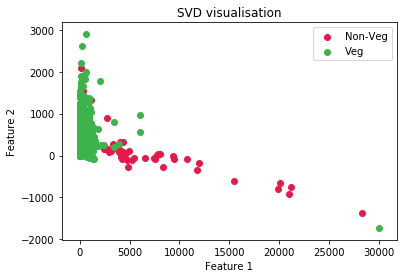

In [141]:
import matplotlib.pyplot as plt
plt.title("SVD visualisation")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
colors=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe','#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
l=0
for type in dic.keys():
    #plt.plot(new_data[i,0:1], new_data[i,1:2], color=colors[l],ls='None')
    plt.scatter(np.array(dic[type])[:,0],np.array(dic[type])[:,1], color=colors[l],label = type)
    plt.legend(loc="best")
    l+=1
    #plt.xlim([-5, 6])
    #plt.ylim([-5, 5])
#plt.savefig(name)
#plt.show()


In [142]:
data.shape

(7229, 38)